In [10]:
import sys
!{sys.executable} -m pip install textblob

In [11]:
import sys
!{sys.executable} -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Pratim\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pratim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pratim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pratim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Pratim\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Pratim\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [12]:
import pandas as pd
import csv
import numpy as np

In [13]:
data = pd.read_csv("C:\\twitter_scrap-master\\saved_tweets\\All\\dump.csv",encoding ='utf-8')
data.head(5)

,Unnamed: 0,tweet_id,text,user_id,user_screen_name,user_name,created_at,retweets,favorites
0,0.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0
1,1.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0
2,2.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0
3,3.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0
4,4.0,8.130000e+17,I literally didn't visit banks after #demoneti...,2925677169,2925677169,Human Husain?,26-12-2016 04:37,0.0,0.0


In [47]:
from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(data):
    #return ' '.join(re.sub((@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", ).split())
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", data).split())
    #We're returning the tweet which is cleaned(after replacin' the above pattern to null which means deleting)


In [36]:
data.head(5)

,Unnamed: 0,tweet_id,text,user_id,user_screen_name,user_name,created_at,retweets,favorites
0,0.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0
1,1.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0
2,2.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0
3,3.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0
4,4.0,8.130000e+17,I literally didn't visit banks after #demoneti...,2925677169,2925677169,Human Husain?,26-12-2016 04:37,0.0,0.0


In [48]:
def get_polarity(data):                         # here we're getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(data))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [49]:
#data['Sentiment'] = np.array([get_polarity(tweet) for tweet in data['text']])

data['Sentiment'] = np.array([get_polarity(data) for data in data['text']])

In [50]:
print(data.head(10))

   Unnamed: 0      tweet_id  \
0         0.0  7.940000e+17   
1         1.0  7.940000e+17   
2         2.0  7.950000e+17   
3         3.0  7.950000e+17   
4         4.0  8.130000e+17   
5         5.0  8.130000e+17   
6         6.0  8.130000e+17   
7         7.0  8.130000e+17   
8         8.0  8.130000e+17   
9         9.0  8.130000e+17   

                                                text     user_id  \
0  #Demonetization of all old design #banknotes\r...   196965482   
1  #Demonetization of all old design #banknotes\r...   196965482   
2  New Post by Rebecca Schaefer: 'YouTube Demonet...   198532748   
3  New Post by Rebecca Schaefer: 'YouTube Demonet...   198532748   
4  I literally didn't visit banks after #demoneti...  2925677169   
5  #DeModiTization is comparatively more importan...  3172305416   
6  ??????? ??? ??? ?????? ??? ??? ???? ??? ???? ?...  1625258700   
7  ??????? ??? ??? ?????? ??? ??? ???? ??? ???? ?...    7.33E+17   
8  Light christmas reading:  Notes (and anecdo

In [51]:
index=0
data['Sentiment'][index]

1

In [52]:
## Classifying the tweets

positive_tweets = data[data['Sentiment']>0]['text']
neutral_tweets = data[data['Sentiment']==0]['text']
negative_tweets = data[data['Sentiment']<0]['text']



#positive_tweets = [ data ['text'] for index, data in enumerate(data['text']) if data['Sentiment'][index] > 0]
#neutral_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
#negative_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]  

In [54]:
print((positive_tweets).head())
print((neutral_tweets).head())
print((negative_tweets).head())

0    #Demonetization of all old design #banknotes\r...
1    #Demonetization of all old design #banknotes\r...
2    New Post by Rebecca Schaefer: 'YouTube Demonet...
3    New Post by Rebecca Schaefer: 'YouTube Demonet...
5    #DeModiTization is comparatively more importan...
Name: text, dtype: object
6     ??????? ??? ??? ?????? ??? ??? ???? ??? ???? ?...
7     ??????? ??? ??? ?????? ??? ??? ???? ??? ???? ?...
9     "Delhiites are from Sri Lanka-Where are you fr...
10    ????? ?? ???? ????? ?? ???? ???? ?? ??? ??! ht...
11    ????? ?? ???? ????? ?? ???? ???? ?? ??? ??! ht...
Name: text, dtype: object
4     I literally didn't visit banks after #demoneti...
8     Light christmas reading:  Notes (and anecdotes...
29    Govt counters Opposition: Those against #DeMon...
30    Mother #earth trembling @ the troubles that #f...
31    Objective behind #DeMonetization note ban laud...
Name: text, dtype: object


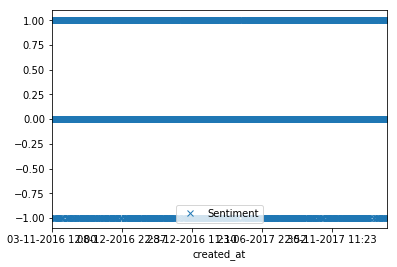

In [57]:
## Plotting sentiment points 
%matplotlib inline
import matplotlib.pyplot as plt
data.plot(x='created_at',y='Sentiment',style='x')
plt.show()


In [61]:
data.head()

,Unnamed: 0,tweet_id,text,user_id,user_screen_name,user_name,created_at,retweets,favorites,Sentiment
0,0.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0,1
1,1.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0,1
2,2.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0,1
3,3.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0,1
4,4.0,8.130000e+17,I literally didn't visit banks after #demoneti...,2925677169,2925677169,Human Husain?,26-12-2016 04:37,0.0,0.0,-1


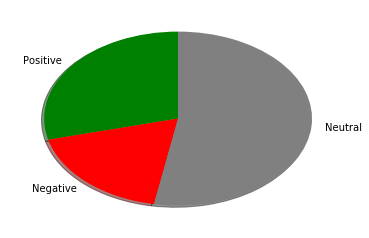

In [58]:
colors = ['green', 'red', 'grey']
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

In [68]:
data.head()

,Unnamed: 0,tweet_id,text,user_id,user_screen_name,user_name,created_at,retweets,favorites,Sentiment
0,0.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0,1
1,1.0,7.940000e+17,#Demonetization of all old design #banknotes\r...,196965482,196965482,Business Recorder,03-11-2016 12:00,0.0,1.0,1
2,2.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0,1
3,3.0,7.950000e+17,New Post by Rebecca Schaefer: 'YouTube Demonet...,198532748,198532748,RCTLJ,07-11-2016 05:12,0.0,0.0,1
4,4.0,8.130000e+17,I literally didn't visit banks after #demoneti...,2925677169,2925677169,Human Husain?,26-12-2016 04:37,0.0,0.0,-1


In [74]:
#%age of + ve -ve tweets

print("positive tweets %age: {}%".format(len(positive_tweets)*100/len(data['text'])))
print("neutral tweets %age: {}%".format(len(neutral_tweets)*100/len(data['text'])))
print("negative tweets %age: {}%".format(len(negative_tweets)*100/len(data['text'])))


positive tweets %age: 28.90608659276302%
neutral tweets %age: 52.87596737084292%
negative tweets %age: 18.21794603639406%


In [76]:
import sys
!{sys.executable} -m pip install wordcloud

  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'error'
  Complete output from command C:\Users\Pratim\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Pratim\\AppData\\Local\\Temp\\pip-install-acngf0mh\\wordcloud\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\Pratim\AppData\Local\Temp\pip-wheel-s5rjtmmu --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.6\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.6\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.6\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.6\wordcloud
  copying

  Failed building wheel for wordcloud
Command "C:\Users\Pratim\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Pratim\\AppData\\Local\\Temp\\pip-install-acngf0mh\\wordcloud\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\Pratim\AppData\Local\Temp\pip-record-8cb3smd1\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\Pratim\AppData\Local\Temp\pip-install-acngf0mh\wordcloud\


In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'